# Visualizing Google Trends Data Over Time

This code allows you to retrieve Google Trends data for specific search terms over a specified time period, and then plot this data to visualize how the search interest for these terms has changed over time.
This code utilizes the `pytrends` package, a Python interface for Google Trends. It consists of two functions: `getdata()` and `plot()`. 

The `getdata()` function takes in two parameters: a `search_term` (or a list of terms) and a `time_period`, and returns a pandas DataFrame showing the interest over time for the search term(s) in the specified time period. The Google Trends interest over time is a measure of the volume of searches for the term(s) relative to the total number of searches done on Google over that time. 

The `plot()` function takes in the DataFrame returned by `getdata()` and a list of columns to plot. It then plots the Google Trends interest over time data for the specified columns. 

In [6]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
# Set up pytrends
def getdata(search_term, time_period):
    pytrends = TrendReq(hl='en-GB', tz=360)
    # Build the payload
    pytrends.build_payload(kw_list=search_term, timeframe=time_period)
    # Get the interest over time
    interest_over_time_df = pytrends.interest_over_time()
    # Print the data
    print(interest_over_time_df)
    #reorder cols
    interest_over_time_df = interest_over_time_df.reset_index()
    return interest_over_time_df

def plot(interest_over_time_df, cols):
    # Assuming you have a DataFrame named 'df' with columns A, B, C, and D
    # Make sure column A is of datetime type for proper plotting
    # Convert column A to datetime type if necessary
    interest_over_time_df['date'] = pd.to_datetime(interest_over_time_df['date'])

    # Set the index of the DataFrame to column A
    interest_over_time_df.set_index('date', inplace=True)

    # Plot the columns B, C, and D
    interest_over_time_df[cols].plot()

    # Add labels and title to the graph
    plt.xlabel('Date')
    plt.ylabel('Trend Search Freq')
    plt.title('Trend frequency per term')

    # Show the graph
    plt.show()

            bicycle  skate  drone  isPartial
date                                        
2021-01-03       27     37     38      False
2021-01-10       27     36     35      False
2021-01-17       28     36     35      False
2021-01-24       28     35     33      False
2021-01-31       26     33     33      False
...             ...    ...    ...        ...
2023-04-30       27     25     40      False
2023-05-07       26     25     37      False
2023-05-14       26     24     37      False
2023-05-21       27     24     35      False
2023-05-28       28     25     40      False

[126 rows x 4 columns]


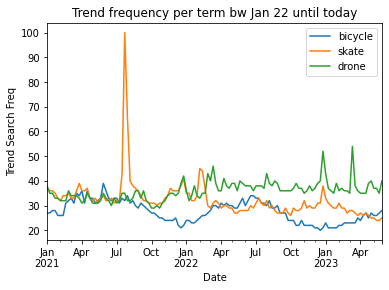

In [23]:
search_term = ['bicycle', 'skate', 'drone']
time_period = '2021-01-01 2023-06-01'


df = getdata(search_term, time_period)
plot(df, search_term)